In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dftrain= pd.read_csv("train_ctrUa4K.csv")
dftest= pd.read_csv("test_lAUu6dG.csv")

<AxesSubplot:title={'center':'Applicants by Credit_History'}, xlabel='Credit_History', ylabel='Count of Applicants'>

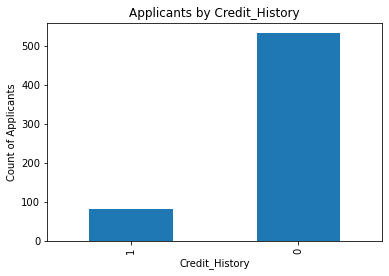

In [45]:
plot = dftrain['Credit_History'].value_counts(ascending=True)
plt.xlabel('Credit_History')
plt.ylabel('Count of Applicants')
plt.title("Applicants by Credit_History")
plot.plot(kind='bar')

In [3]:
dftrain["Self_Employed"] = dftrain.Self_Employed.fillna("No")
dftrain["Loan_Amount_Term"] = dftrain.Loan_Amount_Term.fillna(int(dftrain["Loan_Amount_Term"].mode()))
dftrain["LoanAmount"] = dftrain.LoanAmount.fillna(int(dftrain["LoanAmount"].mode()))
dftrain["Credit_History"] = dftrain.Self_Employed.fillna(0)
dftrain["Gender"] = dftrain.Gender.fillna("Male")
dftrain["Dependents"] = dftrain.Dependents.fillna(1)
dftrain["Dependents"] = dftrain.Dependents.replace(["3+"],3)
dftrain["Education"] = dftrain.Gender.fillna("Not Graduate")

In [4]:
from sklearn.preprocessing import LabelEncoder
la0 = LabelEncoder()
dftrain["Gender_n"] = la0.fit_transform(dftrain.Gender)
la1 =LabelEncoder()
dftrain["Self_Employed_n"] = la1.fit_transform(dftrain.Self_Employed)
la2 =LabelEncoder()
dftrain["Property_Area_n"] = la2.fit_transform(dftrain.Property_Area)
la3 =LabelEncoder()
dftrain["Credit_History"] = la3.fit_transform(dftrain.Credit_History)
la4 = LabelEncoder()
dftrain["Loan_Status_n"] = la4.fit_transform(dftrain.Loan_Status)
la5 = LabelEncoder()
dftrain["Education_n"] = la5.fit_transform(dftrain.Education)

In [10]:
dftrain_clean=dftrain.drop(["Loan_ID","Gender","Education","Married","Self_Employed","Property_Area"],axis=1)
dftrain_clean.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_n,Self_Employed_n,Property_Area_n,Loan_Status_n,Education_n
0,0,5849,0.0,120.0,360.0,0,Y,1,0,2,1,1
1,1,4583,1508.0,128.0,360.0,0,N,1,0,0,0,1
2,0,3000,0.0,66.0,360.0,1,Y,1,1,2,1,1
3,0,2583,2358.0,120.0,360.0,0,Y,1,0,2,1,1
4,0,6000,0.0,141.0,360.0,0,Y,1,0,2,1,1


In [11]:
X=dftrain_clean.drop(["Loan_Status","Loan_Status_n"],axis = 1)
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_n,Self_Employed_n,Property_Area_n,Education_n
0,0,5849,0.0,120.0,360.0,0,1,0,2,1
1,1,4583,1508.0,128.0,360.0,0,1,0,0,1
2,0,3000,0.0,66.0,360.0,1,1,1,2,1
3,0,2583,2358.0,120.0,360.0,0,1,0,2,1
4,0,6000,0.0,141.0,360.0,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,0,0,0,0,0
610,3,4106,0.0,40.0,180.0,0,1,0,0,1
611,1,8072,240.0,253.0,360.0,0,1,0,2,1
612,2,7583,0.0,187.0,360.0,0,1,0,2,1


In [7]:
Y = xtrain.Loan_Status
Y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.25)

In [24]:
from sklearn import linear_model
model = linear_model.LogisticRegression(random_state=0,n_jobs=10)

In [25]:
model.fit(xtrain,ytrain)

LogisticRegression(n_jobs=10, random_state=0)

In [26]:
model.score(xtest,ytest)

0.6753246753246753

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

0.6818181818181818

In [31]:
dftest["Self_Employed"] = dftest.Self_Employed.fillna("No")
dftest["Loan_Amount_Term"] = dftest.Loan_Amount_Term.fillna(int(dftest.Loan_Amount_Term.mode()))
dftest["LoanAmount"] = dftest.LoanAmount.fillna(int(dftest.LoanAmount.mode()))
dftest["Credit_History"] = dftest.Self_Employed.fillna(0)
dftest["Gender"] = dftest.Gender.fillna("Male")
dftest["Dependents"] = dftest.Dependents.fillna(1)
dftest["Dependents"] = dftest.Dependents.replace(["3+"],3)
dftest["Education"] = dftest.Gender.fillna("Not Graduate")

In [32]:
from sklearn.preprocessing import LabelEncoder
la0 = LabelEncoder()
dftest["Gender_n"] = la0.fit_transform(dftest.Gender)
la1 =LabelEncoder()
dftest["Self_Employed_n"] = la1.fit_transform(dftest.Self_Employed)
la2 =LabelEncoder()
dftest["Property_Area_n"] = la2.fit_transform(dftest.Property_Area)
la3 =LabelEncoder()
dftest["Credit_History"] = la3.fit_transform(dftest.Credit_History)
la4 = LabelEncoder()
dftest["Education_n"] = la4.fit_transform(dftest.Education)

In [33]:
dftest=dftest.drop(["Loan_ID","Gender","Education","Married","Self_Employed","Property_Area"],axis=1)

In [34]:
dftest.shape

(367, 10)

In [40]:
predict = model.predict(dftest)
predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [41]:
dfpredict = pd.DataFrame(predict)
dfpredict

,0
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [42]:
dfpredict.value_counts()

Y    366
N      1
dtype: int64